In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr

In [2]:
# Load the dataset
file_path = '../Project-04/Air_Quality_20240801.csv'
data = pd.read_csv(file_path)

In [3]:
# Filter the dataset for relevant indicators
asthma_visits = data[data['Name'] == 'Asthma emergency department visits due to PM2.5'].copy()
pm25_levels = data[data['Name'] == 'Fine particles (PM 2.5)'].copy()

# Print data types to check if 'Start_Date' is in the correct format
print("Data types before conversion:")
print(asthma_visits.dtypes)
print(pm25_levels.dtypes)


Data types before conversion:
Unique ID           int64
Indicator ID        int64
Name               object
Measure            object
Measure Info       object
Geo Type Name      object
Geo Join ID       float64
Geo Place Name     object
Time Period        object
Start_Date         object
Data Value        float64
Message           float64
dtype: object
Unique ID           int64
Indicator ID        int64
Name               object
Measure            object
Measure Info       object
Geo Type Name      object
Geo Join ID       float64
Geo Place Name     object
Time Period        object
Start_Date         object
Data Value        float64
Message           float64
dtype: object


In [4]:

# Convert the 'Start_Date' column to datetime format
asthma_visits['Start_Date'] = pd.to_datetime(asthma_visits['Start_Date'], errors='coerce')
pm25_levels['Start_Date'] = pd.to_datetime(pm25_levels['Start_Date'], errors='coerce')

# Print data types again to ensure conversion was successful
print("Data types after conversion:")
print(asthma_visits.dtypes)
print(pm25_levels.dtypes)


Data types after conversion:
Unique ID                  int64
Indicator ID               int64
Name                      object
Measure                   object
Measure Info              object
Geo Type Name             object
Geo Join ID              float64
Geo Place Name            object
Time Period               object
Start_Date        datetime64[ns]
Data Value               float64
Message                  float64
dtype: object
Unique ID                  int64
Indicator ID               int64
Name                      object
Measure                   object
Measure Info              object
Geo Type Name             object
Geo Join ID              float64
Geo Place Name            object
Time Period               object
Start_Date        datetime64[ns]
Data Value               float64
Message                  float64
dtype: object


In [5]:
# Drop rows with invalid dates
asthma_visits = asthma_visits.dropna(subset=['Start_Date'])
pm25_levels = pm25_levels.dropna(subset=['Start_Date'])

# Aggregate data by year
asthma_visits['Year'] = asthma_visits['Start_Date'].dt.year
pm25_levels['Year'] = pm25_levels['Start_Date'].dt.year


In [6]:
asthma_visits

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message,Year
187,131425,648,Asthma emergency department visits due to PM2.5,Estimated annual rate (under age 18),"per 100,000 children",UHF42,208.0,Canarsie - Flatlands,2009-2011,2009-01-01,81.7,NaN,2009
188,131445,648,Asthma emergency department visits due to PM2.5,Estimated annual rate (under age 18),"per 100,000 children",UHF42,407.0,Southwest Queens,2009-2011,2009-01-01,80.0,NaN,2009
189,131424,648,Asthma emergency department visits due to PM2.5,Estimated annual rate (under age 18),"per 100,000 children",UHF42,207.0,East Flatbush - Flatbush,2009-2011,2009-01-01,115.8,NaN,2009
190,628472,648,Asthma emergency department visits due to PM2.5,Estimated annual rate (under age 18),"per 100,000 children",UHF42,408.0,Jamaica,2015-2017,2015-01-01,69.6,NaN,2015
191,628471,648,Asthma emergency department visits due to PM2.5,Estimated annual rate (under age 18),"per 100,000 children",UHF42,407.0,Southwest Queens,2015-2017,2015-01-01,43.0,NaN,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17255,518976,657,Asthma emergency department visits due to PM2.5,Estimated annual rate (age 18+),"per 100,000 adults",UHF42,503.0,Willowbrook,2012-2014,2012-01-02,15.9,NaN,2012
17256,628525,657,Asthma emergency department visits due to PM2.5,Estimated annual rate (age 18+),"per 100,000 adults",UHF42,503.0,Willowbrook,2015-2017,2015-01-01,12.9,NaN,2015
17257,518966,657,Asthma emergency department visits due to PM2.5,Estimated annual rate (age 18+),"per 100,000 adults",UHF42,403.0,Flushing - Clearview,2012-2014,2012-01-02,9.6,NaN,2012
17808,827392,657,Asthma emergency department visits due to PM2.5,Estimated annual rate (age 18+),"per 100,000 adults",UHF42,408.0,Jamaica,2017-2019,2017-01-01,23.0,NaN,2017


In [7]:
pm25_levels

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message,Year
2,178540,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,209.0,Bensonhurst - Bay Ridge,Annual Average 2012,2011-12-01,8.6,NaN,2011
3,178561,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,409.0,Southeast Queens,Annual Average 2012,2011-12-01,8.0,NaN,2011
4,823217,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,409.0,Southeast Queens,Summer 2022,2022-06-01,6.1,NaN,2022
5,177910,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,209.0,Bensonhurst - Bay Ridge,Summer 2012,2012-06-01,10.0,NaN,2012
6,177952,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,209.0,Bensonhurst - Bay Ridge,Summer 2013,2013-06-01,9.8,NaN,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17900,649801,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF34,201.0,Greenpoint,Annual Average 2019,2019-01-01,8.6,NaN,2019
17901,823438,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF34,202.0,Downtown - Heights - Slope,Annual Average 2022,2022-01-01,6.4,NaN,2022
17902,605851,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF34,402.0,West Queens,Winter 2017-18,2017-12-01,8.7,NaN,2017
17908,173111,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF34,405.0,Ridgewood - Forest Hills,Winter 2008-09,2008-12-01,13.3,NaN,2008


In [8]:
# Calculate annual mean PM2.5 levels and total asthma visits
annual_pm25 = pm25_levels.groupby('Year')['Data Value'].mean().reset_index()
annual_asthma = asthma_visits.groupby('Year')['Data Value'].sum().reset_index()

# Convert infinite values to NaN
annual_pm25['Data Value'].replace([np.inf, -np.inf], np.nan, inplace=True)
annual_asthma['Data Value'].replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values after conversion
annual_pm25.dropna(subset=['Data Value'], inplace=True)
annual_asthma.dropna(subset=['Data Value'], inplace=True)

In [9]:
annual_pm25

,Year,Data Value
0,2008,12.275887
1,2009,10.538061
2,2010,11.990307
3,2011,10.308983
4,2012,10.246336
5,2013,10.786052
6,2014,9.317376
7,2015,8.791312
8,2016,8.334752
9,2017,8.566903


In [10]:
annual_asthma

,Year,Data Value
0,2005,8681.5
1,2009,7054.3
2,2012,6486.9
3,2015,5201.5
4,2017,4184.0


c:\Users\melkabas\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\melkabas\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


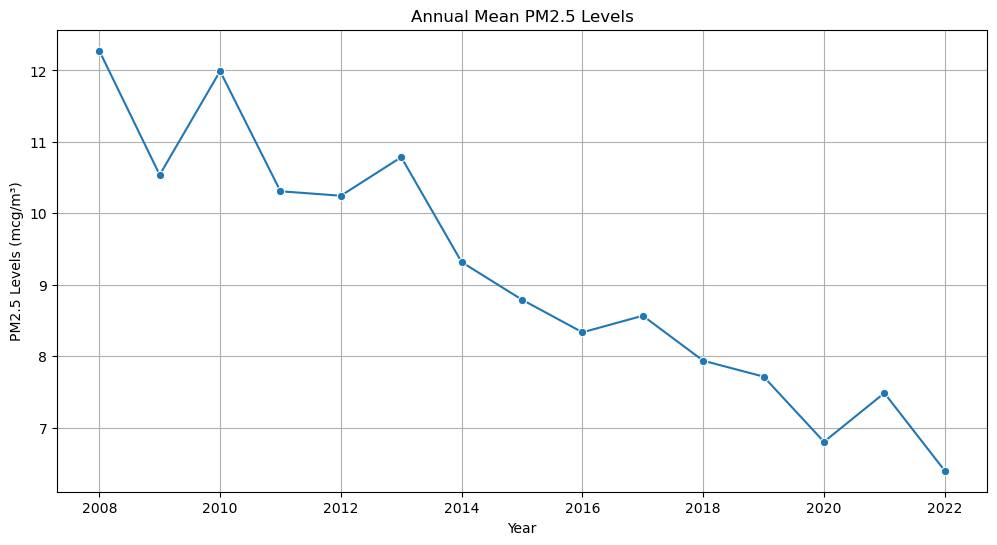

c:\Users\melkabas\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\melkabas\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


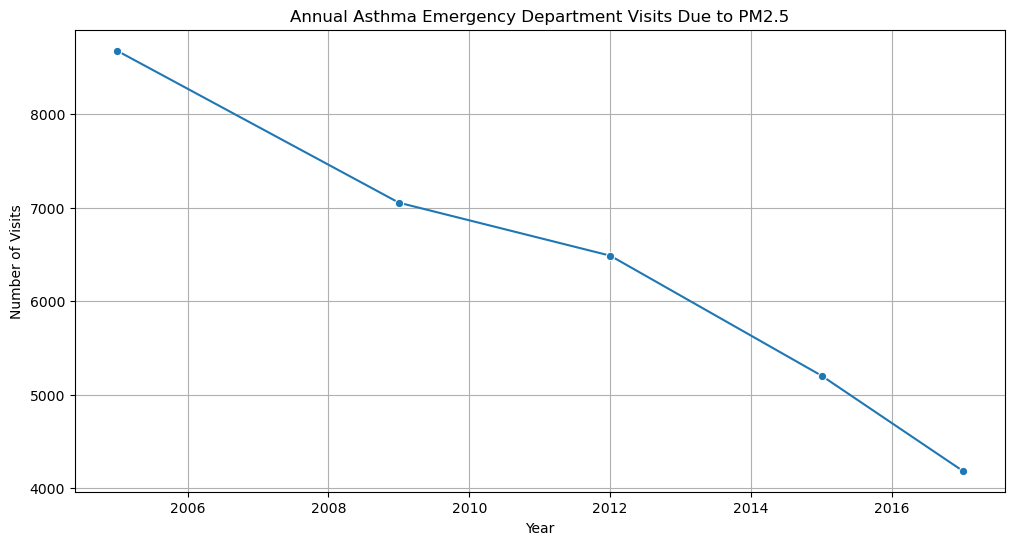

In [11]:
# Plot annual PM2.5 levels
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Data Value', data=annual_pm25, marker='o')
plt.title('Annual Mean PM2.5 Levels')
plt.xlabel('Year')
plt.ylabel('PM2.5 Levels (mcg/m³)')
plt.grid(True)
plt.show()

# Plot annual asthma emergency department visits
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Data Value', data=annual_asthma, marker='o')
plt.title('Annual Asthma Emergency Department Visits Due to PM2.5')
plt.xlabel('Year')
plt.ylabel('Number of Visits')
plt.grid(True)
plt.show()

# Save the processed data for Tableau
annual_pm25.to_csv('../Project-04/Annual_PM25.csv', index=False)
annual_asthma.to_csv('../Project-04/Annual_Asthma_Visits.csv', index=False)